In [33]:
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
# Importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import sqlite3
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

Reading historical data for US stocks using yahoo finanance library

In [4]:
import yfinance as yf

# Fetch historical data for multiple stocks
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
stock_data = yf.download(stocks, start="2020-01-01", end="2024-04-01")

[*********************100%%**********************]  5 of 5 completed


In [5]:
stock_data

Price        Adj Close                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA   
Date                                                                     
2020-01-02   73.059425   94.900497   68.433998  154.493820   28.684000   
2020-01-03   72.349144   93.748497   68.075996  152.570114   29.534000   
2020-01-06   72.925621   95.143997   69.890503  152.964462   30.102667   
2020-01-07   72.582649   95.343002   69.755501  151.569794   31.270666   
2020-01-08   73.750244   94.598503   70.251999  153.984055   32.809334   
...                ...         ...         ...         ...         ...   
2024-03-22  172.279999  178.869995  150.770004  428.739990  170.830002   
2024-03-25  170.850006  179.710007  150.070007  422.859985  172.630005   
2024-03-26  169.710007  178.300003  150.669998  421.649994  177.669998   
2024-03-27  173.309998  179.830002  150.869995  421.429993  179.830002   
2024-03-28  171.479996  180.380005  150.929993  420.720001  175.789993   

Price            Close                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA  ...   
Date                                                                    ...   
2020-01-02   75.087502   94.900497   68.433998  160.619995   28.684000  ...   
2020-01-03   74.357498   93.748497   68.075996  158.619995   29.534000  ...   
2020-01-06   74.949997   95.143997   69.890503  159.029999   30.102667  ...   
2020-01-07   74.597504   95.343002   69.755501  157.580002   31.270666  ...   
2020-01-08   75.797501   94.598503   70.251999  160.089996   32.809334  ...   
...                ...         ...         ...         ...         ...  ...   
2024-03-22  172.279999  178.869995  150.770004  428.739990  170.830002  ...   
2024-03-25  170.850006  179.710007  150.070007  422.859985  172.630005  ...   
2024-03-26  169.710007  178.300003  150.669998  421.649994  177.669998  ...   
2024-03-27  173.309998  179.830002  150.869995  421.429993  179.830002  ...   
2024-03-28  171.479996  180.380005  150.929993  420.720001  175.789993  ...   

Price             Open                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA   
Date                                                                     
2020-01-02   74.059998   93.750000   67.420502  158.779999   28.299999   
2020-01-03   74.287498   93.224998   67.400002  158.320007   29.366667   
2020-01-06   73.447502   93.000000   67.581497  157.080002   29.364668   
2020-01-07   74.959999   95.224998   70.023003  159.320007   30.760000   
2020-01-08   74.290001   94.902000   69.740997  158.929993   31.580000   
...                ...         ...         ...         ...         ...   
2024-03-22  171.759995  177.750000  149.119995  429.700012  166.690002   
2024-03-25  170.570007  178.009995  149.940002  425.239990  168.759995   
2024-03-26  170.000000  180.149994  150.220001  425.609985  178.580002   
2024-03-27  170.410004  179.880005  151.179993  424.440002  181.410004   
2024-03-28  171.750000  180.169998  150.850006  420.959991  177.449997   

Price          Volume                                           
Ticker           AAPL      AMZN     GOOGL      MSFT       TSLA  
Date                                                            
2020-01-02  135480400  80580000  27278000  22622100  142981500  
2020-01-03  146322800  75288000  23408000  21116200  266677500  
2020-01-06  118387200  81236000  46768000  20813700  151995000  
2020-01-07  108872000  80898000  34330000  21634100  268231500  
2020-01-08  132079200  70160000  35314000  27746500  467164500  
...               ...       ...       ...       ...        ...  
2024-03-22   71106600  27964100  29175700  17636500   75454700  
2024-03-25   54288300  29815500  19229300  18060500   74228600  
2024-03-26   57388400  29659000  22149100  16725600  113186200  
2024-03-27   60273300  33272600  228792

In [15]:
print(stock_data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1067 entries, 2020-01-02 to 2024-03-28
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   1067 non-null   float64
 1   (Adj Close, AMZN)   1067 non-null   float64
 2   (Adj Close, GOOGL)  1067 non-null   float64
 3   (Adj Close, MSFT)   1067 non-null   float64
 4   (Adj Close, TSLA)   1067 non-null   float64
 5   (Close, AAPL)       1067 non-null   float64
 6   (Close, AMZN)       1067 non-null   float64
 7   (Close, GOOGL)      1067 non-null   float64
 8   (Close, MSFT)       1067 non-null   float64
 9   (Close, TSLA)       1067 non-null   float64
 10  (High, AAPL)        1067 non-null   float64
 11  (High, AMZN)        1067 non-null   float64
 12  (High, GOOGL)       1067 non-null   float64
 13  (High, MSFT)        1067 non-null   float64
 14  (High, TSLA)        1067 non-null   float64
 15  (Low, AAPL)         1067 non-null   f

In [16]:
print(stock_data.columns)


MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'MSFT'),
            ('Adj Close',  'TSLA'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'MSFT'),
            (    'Close',  'TSLA'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'MSFT'),
            (     'High',  'TSLA'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'MSFT'),
            (      'Low',  'TSLA'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'MSFT'),
            (     'Open',  'TSLA'),
            (   'Volume',  'AAPL'),
            (   'Volume',  'AMZN'),
            (   'Volume', 'G

Some Data Visualization

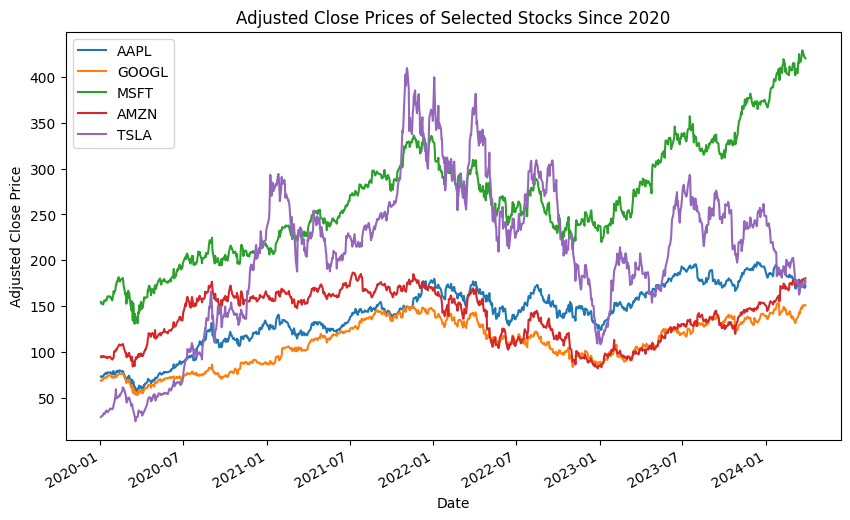

In [13]:
# Select particular stocks for analysis
selected_stocks = stocks

# Filter stock_data to include only selected stocks
selected_stock_data = stock_data['Adj Close'][selected_stocks]

# Plot the adjusted close prices for the selected stocks
selected_stock_data.plot(figsize=(10, 6))
plt.title('Adjusted Close Prices of Selected Stocks Since 2020')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(selected_stocks)
plt.show()

# You can perform further analysis on selected_stock_data as needed.


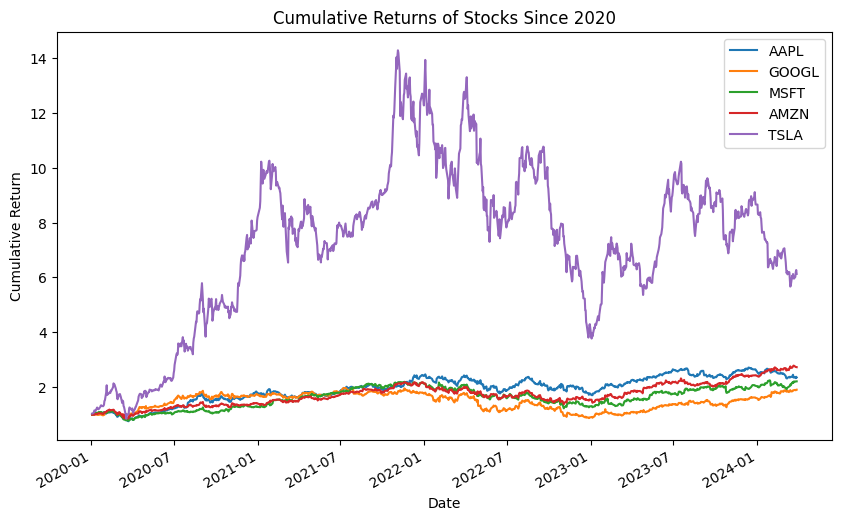

Mean Daily Returns:
Ticker
AAPL     0.001016
AMZN     0.000876
GOOGL    0.000962
MSFT     0.001143
TSLA     0.002595
dtype: float64

Annualized Mean Return:
Ticker
AAPL     0.256109
AMZN     0.220727
GOOGL    0.242338
MSFT     0.288110
TSLA     0.653935
dtype: float64

Volatility:
Ticker
AAPL     0.020782
AMZN     0.023399
GOOGL    0.020934
MSFT     0.020157
TSLA     0.042273
dtype: float64

Annualized Volatility:
Ticker
AAPL     0.329904
AMZN     0.371455
GOOGL    0.332318
MSFT     0.319981
TSLA     0.671065
dtype: float64


In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily returns for each stock
daily_returns = stock_data['Adj Close'].pct_change()

# Calculate cumulative returns for each stock
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 6))
plt.title('Cumulative Returns of Stocks Since 2020')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(stocks)
plt.show()

# Calculate mean daily returns
mean_daily_returns = daily_returns.mean()

# Calculate annualized mean return (assuming 252 trading days in a year)
annualized_mean_return = mean_daily_returns * 252

# Print mean daily returns and annualized mean return
print("Mean Daily Returns:")
print(mean_daily_returns)
print("\nAnnualized Mean Return:")
print(annualized_mean_return)

# Calculate volatility (standard deviation of daily returns)
volatility = daily_returns.std()

# Annualize volatility (assuming 252 trading days in a year)
annualized_volatility = volatility * (252 ** 0.5)

# Print volatility and annualized volatility
print("\nVolatility:")
print(volatility)
print("\nAnnualized Volatility:")
print(annualized_volatility)


In [15]:
# Resample data to quarterly frequency
quarterly_data = selected_stock_data.resample('Q').agg({'min', 'max'})

# Display the minimum and maximum prices for each stock on a quarterly basis
print("Minimum and Maximum Prices of Selected Stocks on a Quarterly Basis:")
print(quarterly_data)


Minimum and Maximum Prices of Selected Stocks on a Quarterly Basis:
Ticker            AAPL                   GOOGL                    MSFT  \
                   min         max         min         max         min   
Date                                                                     
2020-03-31   54.706989   79.779518   52.706501   76.243500  130.610748   
2020-06-30   58.739853   89.611069   54.634998   73.235001  146.708023   
2020-09-30   89.019402  131.456558   70.469498   85.869499  194.280228   
2020-12-31  106.562286  134.146652   72.551003   91.248497  196.161057   
2021-03-31  114.365555  140.496246   86.143997  105.931000  206.317368   
2021-06-30  120.870659  134.841141  106.488998  122.536003  232.854752   
2021-09-30  135.146332  154.497009  122.444504  145.215500  265.227509   
2021-12-31  137.192657  178.065643  133.659500  149.838501  276.996735   
2022-03-31  148.918182  179.724564  125.950996  148.000000  270.946350   
2022-06-30  128.779434  176.423904  105.8050

C:\Users\pv923\AppData\Local\Temp\ipykernel_13440\413175656.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = selected_stock_data.resample('Q').agg({'min', 'max'})


Saving this stock data into local database sqlite

In [20]:
import sqlite3

Make database connection

In [ ]:
conn = sqlite3.connect('stock_data.db')
c = conn.cursor()

Database schema

In [22]:
c.execute('''CREATE TABLE IF NOT EXISTS stock_data (
             Date TEXT,
             Ticker TEXT,
             Price REAL,
             Adj_Close REAL,
             Close REAL,
             Open REAL,
             Volume INTEGER
             )''')

Writing into database

In [23]:
for date, row in stock_data.iterrows():
    for ticker in stock_data.columns.levels[1]:
        price = row[('Close', ticker)]
        adj_close = row[('Adj Close', ticker)]
        close = row[('Close', ticker)]
        open_price = row[('Open', ticker)]
        volume = row[('Volume', ticker)]
        
        c.execute("INSERT INTO stock_data (Date, Ticker, Price, Adj_Close, Close, Open, Volume) VALUES (?, ?, ?, ?, ?, ?, ?)",
                  (date.strftime('%Y-%m-%d'), ticker, price, adj_close, close, open_price, volume))

Comminting changes to database and closing the connection

In [24]:
conn.commit()
conn.close()


Test to read from database to check if the stock data is properly writted

In [28]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('stock_data.db')

# Define the SQL query to select Apple stock data
query = "SELECT * FROM stock_data WHERE Ticker = 'AAPL'"

# Execute the query and read the results into a DataFrame
apple_stock_data = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the Apple stock data
print(apple_stock_data.head())


         Date Ticker      Price  Adj_Close      Close       Open     Volume
0  2020-01-02   AAPL  75.087502  73.059425  75.087502  74.059998  135480400
1  2020-01-03   AAPL  74.357498  72.349144  74.357498  74.287498  146322800
2  2020-01-06   AAPL  74.949997  72.925621  74.949997  73.447502  118387200
3  2020-01-07   AAPL  74.597504  72.582649  74.597504  74.959999  108872000
4  2020-01-08   AAPL  75.797501  73.750244  75.797501  74.290001  132079200


In [94]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('stock_data.db')

# Specify the ticker symbol for the stock you want to retrieve data for
ticker_symbol = 'AAPL'

# Query to retrieve data for the specified stock
query = f"SELECT Date, Close FROM stock_data WHERE Ticker = '{ticker_symbol}'"

# Read data from the database into a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()


In [95]:
df

,Date,Close
0,2020-01-02,75.087502
1,2020-01-03,74.357498
2,2020-01-06,74.949997
3,2020-01-07,74.597504
4,2020-01-08,75.797501
...,...,...
1062,2024-03-22,172.279999
1063,2024-03-25,170.850006
1064,2024-03-26,169.710007
1065,2024-03-27,173.309998


In [96]:
# Creating final dataset for populating our training and testing dataset
data = df.sort_index(ascending=True, axis=0)

new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
for i in range(0, len(data)):
    new_dataset.loc[i, "Date"] = data.loc[i, 'Date']
    new_dataset.loc[i, "Close"] = data.loc[i, "Close"]

new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)
final_dataset = new_dataset.values


In [97]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

In [98]:
# Creating final dataset for populating our training and testing dataset
data = df.sort_index(ascending=True, axis=0)

new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
for i in range(0, len(data)):
    new_dataset.loc[i, "Date"] = data.loc[i, 'Date']
    new_dataset.loc[i, "Close"] = data.loc[i, "Close"]

new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)
final_dataset = new_dataset.values

train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]


In [102]:
x_train_data, y_train_data = [], []
for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i - 60:i, 0])
    y_train_data.append(scaled_data[i, 0])
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

In [103]:
# Training our dataset with LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [104]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)

927/927 - 53s - loss: 0.0042 - 53s/epoch - 57ms/step


In [105]:
# Generating our test dataset to evaluate the model performance
inputs_data = new_dataset[len(new_dataset) - len(valid_data) - 60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

In [106]:
X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i - 60:i, 0])
X_test = np.array(X_test)

In [107]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_closing_price = lstm_model.predict(X_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

3/3 [==============================] - 2s 34ms/step


In [108]:
# Saving the model in the native Keras format
lstm_model.save("Apple_saved_model.keras")

In [111]:
# Validating our model using validation data we split earlier and visualizing our predicted price
apple_train_data = new_dataset[:987]
apple_valid_data = new_dataset[987:].copy()  # Create a copy to avoid SettingWithCopyWarning
apple_valid_data.loc[:, 'Predictions'] = predicted_closing_price


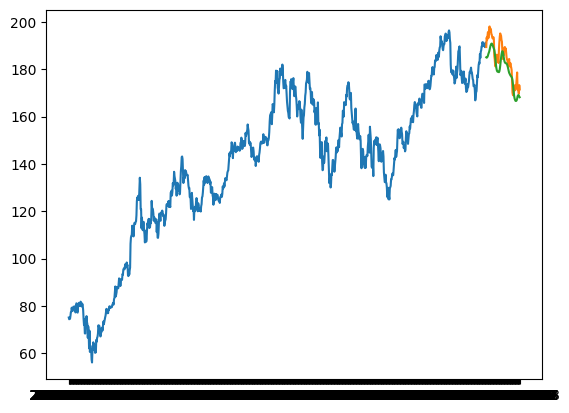

In [114]:
# Visualization
plt.plot(apple_train_data["Close"])
plt.plot(apple_valid_data[['Close', "Predictions"]])
plt.show()


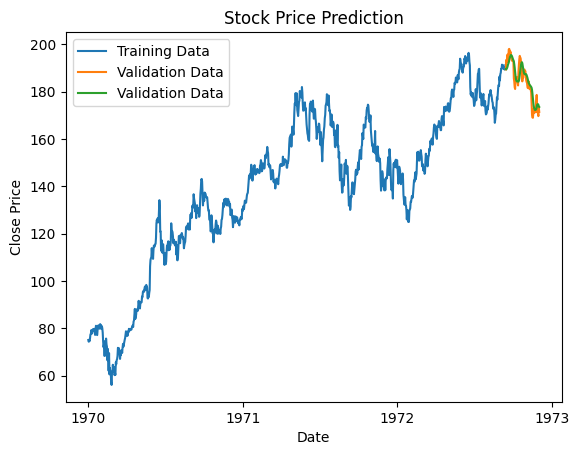

In [51]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

# Plotting
plt.plot(train_data.index, train_data["Close"], label='Training Data')
plt.plot(valid_data.index, valid_data[['Close', "Predictions"]], label='Validation Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction')
plt.legend()

# Setting x-axis to show only years
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

plt.show()


In [113]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('stock_data.db')

# Specify the ticker symbol for the stock you want to retrieve data for
ticker_symbol = 'GOOGL'

# Query to retrieve data for the specified stock
query = f"SELECT Date, Close FROM stock_data WHERE Ticker = '{ticker_symbol}'"

# Read data from the database into a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Creating final dataset for populating our training and testing dataset
data = df.sort_index(ascending=True, axis=0)

new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
for i in range(0, len(data)):
    new_dataset.loc[i, "Date"] = data.loc[i, 'Date']
    new_dataset.loc[i, "Close"] = data.loc[i, "Close"]

new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)
final_dataset = new_dataset.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

# Creating final dataset for populating our training and testing dataset
data = df.sort_index(ascending=True, axis=0)

new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
for i in range(0, len(data)):
    new_dataset.loc[i, "Date"] = data.loc[i, 'Date']
    new_dataset.loc[i, "Close"] = data.loc[i, "Close"]

new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)
final_dataset = new_dataset.values

train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]

x_train_data, y_train_data = [], []
for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i - 60:i, 0])
    y_train_data.append(scaled_data[i, 0])
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

# Training our dataset with LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)

# Generating our test dataset to evaluate the model performance
inputs_data = new_dataset[len(new_dataset) - len(valid_data) - 60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i - 60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_closing_price = lstm_model.predict(X_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

# Saving the model in the native Keras format
lstm_model.save("saved_model.keras")

# Validating our model using validation data we split earlier and visualizing our predicted price
GOOGL_train_data = new_dataset[:987]
GOOGL_valid_data = new_dataset[987:].copy()  # Create a copy to avoid SettingWithCopyWarning
GOOGL_valid_data.loc[:, 'Predictions'] = predicted_closing_price

927/927 - 56s - loss: 0.0046 - 56s/epoch - 60ms/step
3/3 [==============================] - 2s 40ms/step


In [115]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('stock_data.db')

# Specify the ticker symbol for the stock you want to retrieve data for
ticker_symbol = 'TSLA'

# Query to retrieve data for the specified stock
query = f"SELECT Date, Close FROM stock_data WHERE Ticker = '{ticker_symbol}'"

# Read data from the database into a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Creating final dataset for populating our training and testing dataset
data = df.sort_index(ascending=True, axis=0)

new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
for i in range(0, len(data)):
    new_dataset.loc[i, "Date"] = data.loc[i, 'Date']
    new_dataset.loc[i, "Close"] = data.loc[i, "Close"]

new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)
final_dataset = new_dataset.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

# Creating final dataset for populating our training and testing dataset
data = df.sort_index(ascending=True, axis=0)

new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
for i in range(0, len(data)):
    new_dataset.loc[i, "Date"] = data.loc[i, 'Date']
    new_dataset.loc[i, "Close"] = data.loc[i, "Close"]

new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)
final_dataset = new_dataset.values

train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]

x_train_data, y_train_data = [], []
for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i - 60:i, 0])
    y_train_data.append(scaled_data[i, 0])
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

# Training our dataset with LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)

# Generating our test dataset to evaluate the model performance
inputs_data = new_dataset[len(new_dataset) - len(valid_data) - 60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i - 60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_closing_price = lstm_model.predict(X_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

# Saving the model in the native Keras format
lstm_model.save("saved_model.keras")

# Validating our model using validation data we split earlier and visualizing our predicted price
TSLA_train_data = new_dataset[:987]
TSLA_valid_data = new_dataset[987:].copy()  # Create a copy to avoid SettingWithCopyWarning
TSLA_valid_data.loc[:, 'Predictions'] = predicted_closing_price

927/927 - 55s - loss: 0.0054 - 55s/epoch - 59ms/step
3/3 [==============================] - 2s 31ms/step


In [145]:
combined_data = pd.concat([
    apple_train_data.assign(Stock='AAPL'),
    GOOGL_train_data.assign(Stock='GOOGL'),
    TSLA_train_data.assign(Stock='TSLA'),
    apple_valid_data.assign(Stock='AAPL'),
    GOOGL_valid_data.assign(Stock='GOOGL'),
    TSLA_valid_data.assign(Stock='TSLA')
])

In [150]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go
import pandas as pd

# Create the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Stock Price Prediction Dashboard"),
    dcc.Dropdown(
        id='stock-dropdown',
        options=[{'label': stock, 'value': stock} for stock in combined_data['Stock'].unique()],
        value='AAPL'  # Default value
    ),
    dcc.Graph(id='price-plot')
])

# Define the callback to update the plot based on the selected stock
@app.callback(
    Output('price-plot', 'figure'),
    [Input('stock-dropdown', 'value')]
)
def update_plot(selected_stock):
    # Filter data for the selected stock
    filtered_data = combined_data[combined_data['Stock'] == selected_stock]
    
    # Create the plot
    fig = go.Figure()
    # Plot actual data with blue color
    fig.add_trace(go.Scatter(x=filtered_data.index, y=filtered_data['Close'], mode='lines', name='Actual Price', line=dict(color='blue')))
    # Plot predicted data with green color
    fig.add_trace(go.Scatter(x=filtered_data.index, y=filtered_data['Predictions'], mode='lines', name='Predicted Price', line=dict(color='green')))
    
    # Add training data as a line plot with red color
    train_data_indices = filtered_data.index[filtered_data['Predictions'].isnull()]
    train_data_values = filtered_data.loc[train_data_indices, 'Close']
    fig.add_trace(go.Scatter(x=train_data_indices, y=train_data_values, mode='lines', name='Train Data', line=dict(color='red')))
    
    fig.update_layout(title=f"Actual vs Predicted Prices for {selected_stock}",
                      xaxis_title="Date",
                      yaxis_title="Price")
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
